In [1]:
# Required Libraries
!pip install tensorflow faiss-cpu
import tensorflow as tf
import numpy as np
import faiss
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from tensorflow.keras.preprocessing import image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 16.6 MB/s eta 0:00:00


In [2]:
# Load MobileNetV2 without top layer (to get embeddings)
model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

<ipython-input-2-66b8e0eaa2d1>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from PIL import Image
def load_image(path):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0)

# Load multiple product images
image_paths = ['shoes1.jpeg', 'shoes2.jpeg', 'shoes3.jpeg']
images = [load_image(p) for p in image_paths]


In [5]:
features = [model.predict(img)[0] for img in images]
features = np.array(features).astype('float32')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [6]:
index = faiss.IndexFlatL2(1280)  # 1280 is output size of MobileNetV2
index.add(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


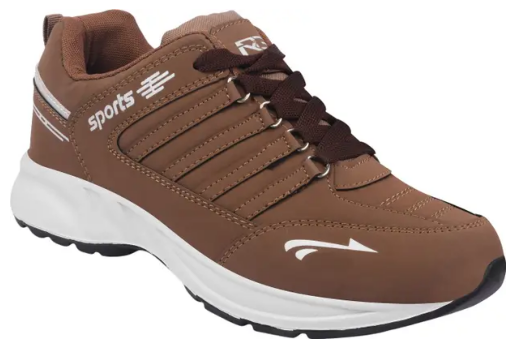

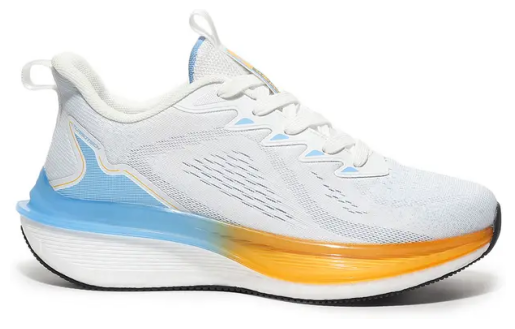

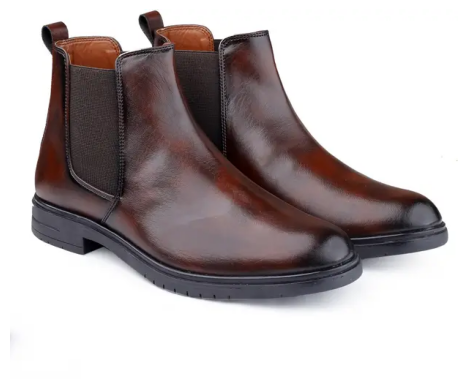

In [8]:
# Upload query image
query_img = load_image('query_shoe1.jpeg')
query_feat = model.predict(query_img).astype('float32')

# Search
_, indices = index.search(query_feat, k=3)

# Show results
for i in indices[0]:
    img = Image.open(image_paths[i])
    plt.imshow(img)
    plt.axis('off')
    plt.show()
